<a href="https://colab.research.google.com/github/varunpothu/Smart_HealthCare_Chatbot/blob/main/Disease_Q%26A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Required Libraries

In [ ]:
pip install pandas numpy sentence-transformers streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 60.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 114.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00


### Mounting the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the Libraries

In [ ]:
### Import Libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
from sentence_transformers import SentenceTransformer
from transformers import BertTokenizer, BertModel
from textblob import TextBlob

# File and OS Operations
import os
import shutil
from threading import Thread
from pyngrok import ngrok

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

# Miscellaneous
import pickle
import re
import torch
from google.colab import files

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [ ]:
# Load the Dataset
df = pd.read_csv("/content/drive/MyDrive/4.csv")

## Data Preprocessing


In [ ]:
# Data Cleaning
# Remove duplicates and handle missing values
df.drop_duplicates(inplace=True)
df.dropna(subset=['question', 'answer'], inplace=True)

In [ ]:
# Text Preprocessing
# Removing Special Charectors
df['question_clean'] = df['question'].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.strip()
df['answer_clean'] = df['answer'].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.strip()

## Model Implementation

In [ ]:
# Load Models
mini_lm_model = SentenceTransformer('all-MiniLM-L6-v2')
distilroberta_model = SentenceTransformer('all-distilroberta-v1')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

L2 Normalization for Bert

In [ ]:
# Function to generate and normalize BERT embeddings
def get_normalized_bert_embedding(text, tokenizer, model):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Generate BERT embeddings
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the mean pooled embedding (mean across tokens)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    # Normalize the embedding
    normalized_embedding = normalize([embedding])[0]  # L2 normalization

    return normalized_embedding


## Model Embeddings

### MiniLM Embeddings

In [ ]:
import pickle

# Generate MiniLM Embeddings
df['mini_lm_embedding'] = df['question_clean'].apply(lambda x: mini_lm_model.encode(x).tolist())

# Inspect a sample
print("Sample MiniLM Embedding:")
print(df['mini_lm_embedding'].iloc[0][:5])  # Print the first 5 values of the first embedding

# Save to .pkl file
with open('mini_lm_embeddings.pkl', 'wb') as file:
    pickle.dump(df['mini_lm_embedding'].tolist(), file)
print("MiniLM Embeddings saved to 'mini_lm_embeddings.pkl'.")


Sample MiniLM Embedding:
[1.4336372260004282e-05, -0.06868179887533188, -0.03455418720841408, -0.014005390927195549, -0.06856377422809601]
MiniLM Embeddings saved to 'mini_lm_embeddings.pkl'.


In [ ]:
# MiniLM Embeddings Shape
print("MiniLM Embedding Shape:")
print(f"Length: {len(df['mini_lm_embedding'])}")  # Number of rows
print(f"Dimension: {len(df['mini_lm_embedding'][0])}")  # Size of each embedding

MiniLM Embedding Shape:
Length: 16359
Dimension: 384


### DistilRoBERTa Embeddings

In [ ]:
# Generate DistilRoBERTa Embeddings
df['distilroberta_embedding'] = df['question_clean'].apply(lambda x: distilroberta_model.encode(x).tolist())

# Inspect a sample
print("Sample DistilRoBERTa Embedding:")
print(df['distilroberta_embedding'].iloc[0][:5])  # Print the first 5 values of the first embedding

# Save to .pkl file
with open('distilroberta_embeddings.pkl', 'wb') as file:
    pickle.dump(df['distilroberta_embedding'].tolist(), file)
print("DistilRoBERTa Embeddings saved to 'distilroberta_embeddings.pkl'.")


Sample DistilRoBERTa Embedding:
[-0.032636720687150955, 0.0003571466077119112, -0.0022292197681963444, -0.10043741017580032, 0.02768794819712639]
DistilRoBERTa Embeddings saved to 'distilroberta_embeddings.pkl'.


In [ ]:
# DistilRoBERTa Embeddings Shape
print("\nDistilRoBERTa Embedding Shape:")
print(f"Length: {len(df['distilroberta_embedding'])}")  # Number of rows
print(f"Dimension: {len(df['distilroberta_embedding'][0])}")  # Size of each embedding


DistilRoBERTa Embedding Shape:
Length: 16359
Dimension: 768


### BERT Embeddings

In [ ]:
# Generate BERT Embeddings
df['bert_embedding'] = df['question_clean'].apply(
    lambda x: bert_model(**bert_tokenizer(x, return_tensors="pt")).last_hidden_state.mean(dim=1).squeeze().detach().numpy().tolist()
)

# Inspect a sample
print("Sample BERT Embedding:")
print(df['bert_embedding'].iloc[0][:5])  # Print the first 5 values of the first embedding

# Save to .pkl file
with open('bert_embeddings.pkl', 'wb') as file:
    pickle.dump(df['bert_embedding'].tolist(), file)
print("BERT Embeddings saved to 'bert_embeddings.pkl'.")


Sample BERT Embedding:
[0.12811386585235596, 0.13659337162971497, 0.26791512966156006, -0.48154762387275696, 0.23079435527324677]
BERT Embeddings saved to 'bert_embeddings.pkl'.


In [ ]:
# BERT Embeddings Shape
print("\nBERT Embedding Shape:")
print(f"Length: {len(df['bert_embedding'])}")  # Number of rows
print(f"Dimension: {len(df['bert_embedding'][0])}")  # Size of each embedding


BERT Embedding Shape:
Length: 16359
Dimension: 768


### Normalized BERT Embeddings

In [ ]:
from sklearn.preprocessing import normalize
import pickle

# Generate and Normalize BERT Embeddings
df['bert_embedding_normalized'] = df['question_clean'].apply(
    lambda x: normalize([bert_model(**bert_tokenizer(x, return_tensors="pt")).last_hidden_state.mean(dim=1).squeeze().detach().numpy()])[0].tolist()
)

# Inspect a sample
print("Sample Normalized BERT Embedding:")
print(df['bert_embedding_normalized'].iloc[0][:5])  # Print the first 5 values of the first normalized embedding

# Save to .pkl file
with open('normalized_bert_embeddings.pkl', 'wb') as file:
    pickle.dump(df['bert_embedding_normalized'].tolist(), file)
print("Normalized BERT Embeddings saved to 'normalized_bert_embeddings.pkl'.")


Sample Normalized BERT Embedding:
[0.013544896904069986, 0.014441396520154918, 0.028325449288123566, -0.050911842183212194, 0.024400838483947297]
Normalized BERT Embeddings saved to 'normalized_bert_embeddings.pkl'.


In [ ]:
# Normalized BERT Embeddings Shape
print("\nNormalized BERT Embedding Shape:")
print(f"Length: {len(df['bert_embedding_normalized'])}")  # Number of rows
print(f"Dimension: {len(df['bert_embedding_normalized'][0])}")  # Size of each embedding


Normalized BERT Embedding Shape:
Length: 16359
Dimension: 768


## Embeddings Checks

Checking Embeddings Range Individually

In [ ]:
print(f"MiniLM Range: {min(df['mini_lm_embedding'][0])} to {max(df['mini_lm_embedding'][0])}")
print(f"DistilRoBERTa Range: {min(df['distilroberta_embedding'][0])} to {max(df['distilroberta_embedding'][0])}")
print(f"BERT Range: {min(df['bert_embedding'][0])} to {max(df['bert_embedding'][0])}")
print(f"Normalized BERT Range: {min(df['bert_embedding_normalized'][0])} to {max(df['bert_embedding_normalized'][0])}")

MiniLM Range: -0.1530136913061142 to 0.1533326953649521
DistilRoBERTa Range: -0.13501250743865967 to 0.12698109447956085
BERT Range: -2.86564302444458 to 1.1812653541564941
Normalized BERT Range: -0.3029714158707932 to 0.12488981838108508


Plots of Embeddings

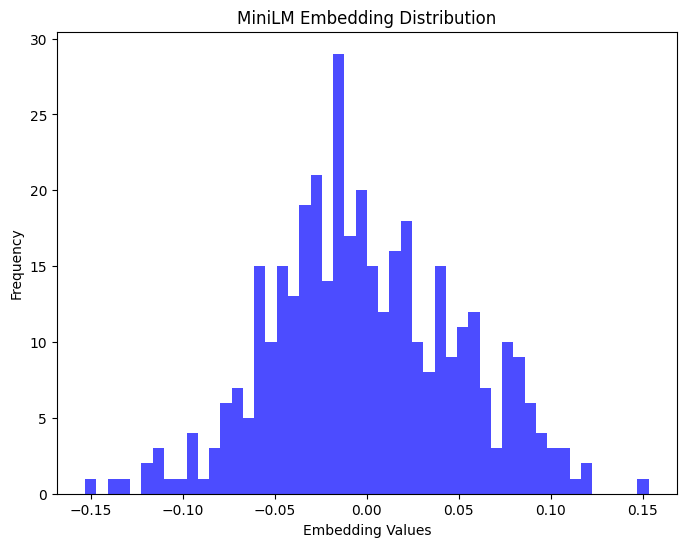

In [ ]:
# MiniLM embeddings Plot
plt.figure(figsize=(8, 6))
plt.hist(df['mini_lm_embedding'][0], bins=50, color='blue', alpha=0.7)
plt.title("MiniLM Embedding Distribution")
plt.xlabel("Embedding Values")
plt.ylabel("Frequency")
plt.show()

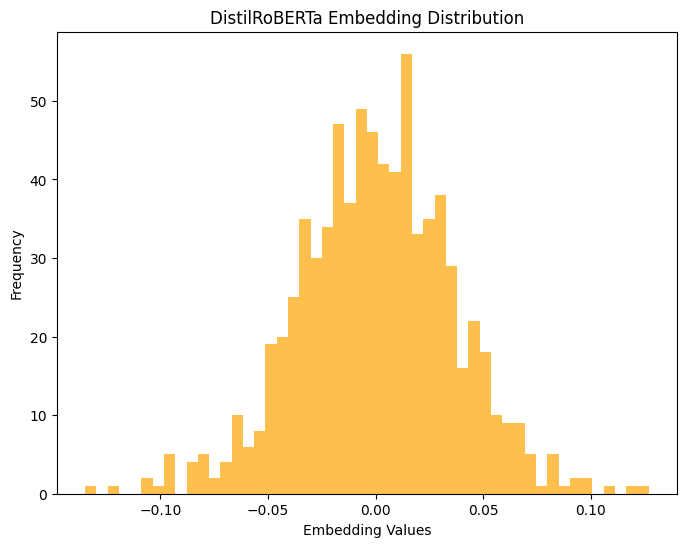

In [ ]:
# DistilRoBERTa embeddings
plt.figure(figsize=(8, 6))
plt.hist(df['distilroberta_embedding'][0], bins=50, color='orange', alpha=0.7)
plt.title("DistilRoBERTa Embedding Distribution")
plt.xlabel("Embedding Values")
plt.ylabel("Frequency")
plt.show()

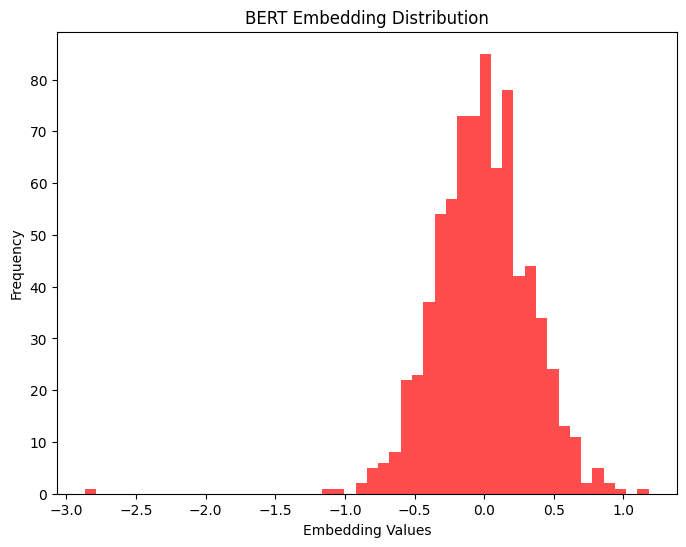

In [ ]:
# BERT embeddings
plt.figure(figsize=(8, 6))
plt.hist(df['bert_embedding'][0], bins=50, color='red', alpha=0.7)
plt.title("BERT Embedding Distribution")
plt.xlabel("Embedding Values")
plt.ylabel("Frequency")
plt.show()

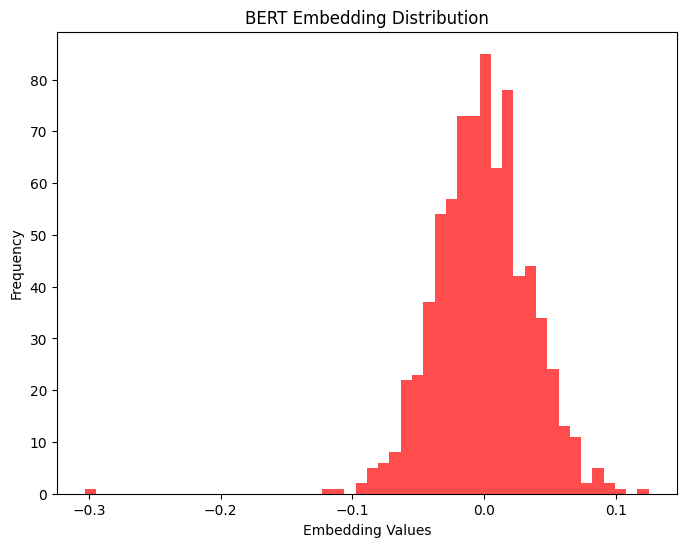

In [ ]:
# BERT embeddings
plt.figure(figsize=(8, 6))
plt.hist(df['bert_embedding_normalized'][0], bins=50, color='red', alpha=0.7)
plt.title("BERT Embedding Distribution")
plt.xlabel("Embedding Values")
plt.ylabel("Frequency")
plt.show()

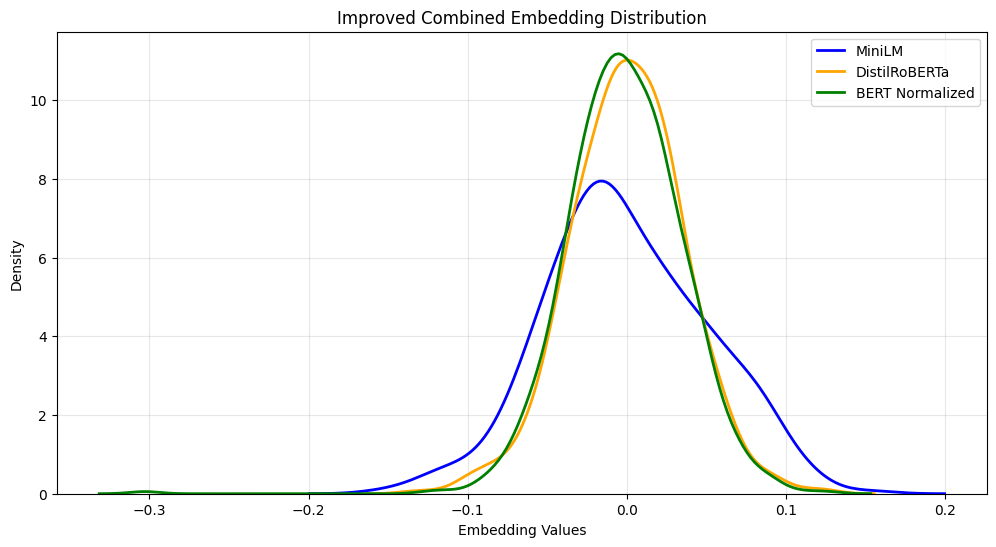

In [ ]:
# Flatten embeddings for MiniLM, DistilRoBERTa, and BERT normalized
mini_lm_flat = np.array(df['mini_lm_embedding'][0])
distilroberta_flat = np.array(df['distilroberta_embedding'][0])
bert_normalized_flat = np.array(df['bert_embedding_normalized'][0])

# Combined density plot
plt.figure(figsize=(12, 6))

sns.kdeplot(mini_lm_flat, color='blue', linewidth=2, label='MiniLM')
sns.kdeplot(distilroberta_flat, color='orange', linewidth=2, label='DistilRoBERTa')
sns.kdeplot(bert_normalized_flat, color='green', linewidth=2, label='BERT Normalized')

plt.title("Improved Combined Embedding Distribution")
plt.xlabel("Embedding Values")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Example Sentence for checking embeddings
sentences = ["What is fever?"]

# Generating Sentence Embeddings with MiniLM
mini_lm_embeddings = mini_lm_model.encode(sentences)
print("MiniLM Embeddings:")
print(mini_lm_embeddings)

# Generating Sentence Embeddings with DistilRoBERTa
distilroberta_embeddings = distilroberta_model.encode(sentences)
print("\nDistilRoBERTa Embeddings:")
print(distilroberta_embeddings)

# Tokenizing Input Using BERT Tokenizer
inputs = bert_tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
print("\nTokenized Input (BERT):")
print(inputs)

# Generating Contextual Embeddings Using BERT
outputs = bert_model(**inputs)
contextual_embeddings = outputs.last_hidden_state
print("\nContextual Embeddings (BERT):")
print(contextual_embeddings)


MiniLM Embeddings:
[[-1.60971992e-02  8.43317509e-02 -5.24292402e-02  4.19026352e-02
   3.06687821e-02 -4.30867774e-03  1.05908446e-01  4.84521352e-02
   4.30683568e-02  1.98244229e-02 -2.27148850e-02 -7.63118491e-02
   3.89103331e-02  4.67453226e-02 -7.02963956e-03 -8.99697468e-02
   1.25480508e-02 -5.22812195e-02 -1.86312348e-02 -2.97989026e-02
  -1.07673272e-01  4.36285026e-02 -2.13029813e-02  1.85474548e-02
  -1.37431510e-02  7.56752267e-02  5.26852906e-03  3.39314304e-02
  -4.18777280e-02  5.37182800e-02 -1.92828216e-02 -1.29404981e-02
   2.34720893e-02  6.04646187e-03 -9.01623070e-03  5.23493029e-02
   1.35905342e-03 -3.97192091e-02 -8.76333043e-02  6.98100179e-02
  -1.24881770e-02  4.67455238e-02  5.17996736e-02 -1.26060387e-02
   6.79798350e-02  5.72374202e-02 -8.37098435e-02  1.02286145e-01
   7.07296282e-02 -1.64223611e-02 -3.49483220e-03  5.16061019e-03
  -2.79934779e-02  9.33853909e-02 -2.07766686e-02  3.98844928e-02
  -6.14962913e-02 -9.64578837e-02 -1.05596147e-01 -3.4798

Loading Embedings via Saved pickle files

In [ ]:

# Load embeddings
with open('mini_lm_embeddings.pkl', 'rb') as file:
    mini_lm_embeddings = pickle.load(file)

with open('distilroberta_embeddings.pkl', 'rb') as file:
    distilroberta_embeddings = pickle.load(file)

with open('bert_embeddings.pkl', 'rb') as file:
    bert_embeddings = pickle.load(file)

with open('normalized_bert_embeddings.pkl', 'rb') as file:
    normalized_bert_embeddings = pickle.load(file)

# Load the original questions
original_questions = df['question_clean'].tolist()

# Function to preprocess and correct spelling
def preprocess_input(user_input):
    corrected_input = str(TextBlob(user_input).correct())
    return corrected_input


### Predictions

MiniLM Model Function

In [ ]:
def predict_minilm(user_input):
    # Preprocess input
    user_input = preprocess_input(user_input)

    # Generate MiniLM embedding for the input
    input_embedding = mini_lm_model.encode(user_input).tolist()

    # Compute cosine similarity with existing embeddings
    similarities = cosine_similarity([input_embedding], mini_lm_embeddings)[0]

    # Find the closest match
    best_match_idx = similarities.argmax()

    # Get the matched question and corresponding answer
    matched_question = original_questions[best_match_idx]
    answer = df.loc[df['question_clean'] == matched_question, 'answer'].iloc[0]

    return matched_question, answer, similarities[best_match_idx]

DistilRoBERTa Model Function

In [ ]:
def predict_distilroberta(user_input):
    # Preprocess input
    user_input = preprocess_input(user_input)

    # Generate DistilRoBERTa embedding for the input
    input_embedding = distilroberta_model.encode(user_input).tolist()

    # Compute cosine similarity with existing embeddings
    similarities = cosine_similarity([input_embedding], distilroberta_embeddings)[0]

    # Find the closest match
    best_match_idx = similarities.argmax()

    # Get the matched question and corresponding answer
    matched_question = original_questions[best_match_idx]
    answer = df.loc[df['question_clean'] == matched_question, 'answer'].iloc[0]

    return matched_question, answer, similarities[best_match_idx]

Bert Model Function

In [ ]:
def predict_bert(user_input):
    # Preprocess input
    user_input = preprocess_input(user_input)

    # Generate BERT embedding for the input
    input_embedding = normalize([
        bert_model(**bert_tokenizer(user_input, return_tensors="pt")).last_hidden_state.mean(dim=1).squeeze().detach().numpy()
    ])[0].tolist()

    # Compute cosine similarity with existing embeddings
    similarities = cosine_similarity([input_embedding], normalized_bert_embeddings)[0]

    # Find the closest match
    best_match_idx = similarities.argmax()

    # Get the matched question and corresponding answer
    matched_question = original_questions[best_match_idx]
    answer = df.loc[df['question_clean'] == matched_question, 'answer'].iloc[0]

    return matched_question, answer, similarities[best_match_idx]

Combined Model Function

In [ ]:
def predict_combined(user_input):
    # Preprocess input
    user_input = preprocess_input(user_input)

    # Generate embeddings for the input
    minilm_embedding = mini_lm_model.encode(user_input).tolist()
    distilroberta_embedding = distilroberta_model.encode(user_input).tolist()
    bert_embedding = normalize([
        bert_model(**bert_tokenizer(user_input, return_tensors="pt")).last_hidden_state.mean(dim=1).squeeze().detach().numpy()
    ])[0].tolist()

    # Compute similarities
    minilm_similarities = cosine_similarity([minilm_embedding], mini_lm_embeddings)[0]
    distilroberta_similarities = cosine_similarity([distilroberta_embedding], distilroberta_embeddings)[0]
    bert_similarities = cosine_similarity([bert_embedding], normalized_bert_embeddings)[0]

    # Combine similarities (weighted average)
    combined_similarities = (minilm_similarities + distilroberta_similarities + bert_similarities) / 3

    # Find the closest match
    best_match_idx = combined_similarities.argmax()

    # Get the matched question and corresponding answer
    matched_question = original_questions[best_match_idx]
    answer = df.loc[df['question_clean'] == matched_question, 'answer'].iloc[0]


    return matched_question, answer, combined_similarities[best_match_idx]

Predictions of All models

In [ ]:
def predict_and_answer(user_input):
    print("Correcting input for spelling errors...")
    corrected_input = preprocess_input(user_input)
    print(f"Corrected Input: {corrected_input}\n")

    # MiniLM Prediction
    print("MiniLM Prediction:")
    question, answer, score = predict_minilm(corrected_input)
    print(f"Matched Question: {question}")
    print(f"Answer: {answer} (Score: {score:.2f})\n")

    # DistilRoBERTa Prediction
    print("DistilRoBERTa Prediction:")
    question, answer, score = predict_distilroberta(corrected_input)
    print(f"Matched Question: {question}")
    print(f"Answer: {answer} (Score: {score:.2f})\n")

    # BERT Prediction
    print("BERT Prediction:")
    question, answer, score = predict_bert(corrected_input)
    print(f"Matched Question: {question}")
    print(f"Answer: {answer} (Score: {score:.2f})\n")

    # Combined Prediction
    print("Combined Prediction:")
    question, answer, score = predict_combined(corrected_input)
    print(f"Matched Question: {question}")
    print(f"Answer: {answer} (Score: {score:.2f})")


Checking Predictions Using Example

In [ ]:
user_input = input("Enter your question: ")
predict_and_answer(user_input)


Enter your question: what is fever
Correcting input for spelling errors...
Corrected Input: what is fever

MiniLM Prediction:
Matched Question: what is are fever
Answer: A fever is a body temperature that is higher than normal. It is not an illness. It is part of your body's defense against infection. Most bacteria and viruses that cause infections do well at the body's normal temperature (98.6 F). A slight fever can make it harder for them to survive. Fever also activates your body's immune system.    Infections cause most fevers. There can be many other causes, including       -  Medicines    -  Heat exhaustion    -  Cancers    -  Autoimmune diseases       Treatment depends on the cause of your fever. Your health care provider may recommend using over-the-counter medicines such as acetaminophen or ibuprofen to lower a very high fever. Adults can also take aspirin, but children with fevers should not take aspirin. It is also important to drink enough liquids to prevent dehydration. (S

Extracting the Unique Answers

In [ ]:
def extract_relevant_sentence_minilm(answer, corrected_input, minilm_model):
    """
    Extract the most relevant sentence from the answer based on cosine similarity using MiniLM.
    """
    from sklearn.metrics.pairwise import cosine_similarity

    # Split the answer into individual sentences
    sentences = answer.split('.')

    # Generate embeddings for each sentence using MiniLM
    embeddings = [minilm_model.encode(sentence.strip()).tolist() for sentence in sentences if sentence.strip()]

    # Generate embedding for the corrected input
    input_embedding = minilm_model.encode(corrected_input).tolist()

    # Compute cosine similarity between the input embedding and each sentence embedding
    similarities = [cosine_similarity([input_embedding], [embedding])[0][0] for embedding in embeddings]

    # Find the sentence with the highest similarity
    max_index = similarities.index(max(similarities))
    return sentences[max_index].strip()


In [ ]:
def predict_and_answer_minilm(user_input, minilm_model):
    """
    Predict the most relevant answer for a user's query using MiniLM.
    Provide both the most relevant sentence and the full answer paragraph.
    """
    print("Medical Q&A Chatbot: MiniLM-Based Response")
    print("=" * 50)

    # Preprocess the input
    corrected_input = preprocess_input(user_input)  # Assume preprocess_input handles corrections

    # MiniLM Prediction
    print("MiniLM Prediction:")
    question, full_answer, score = predict_minilm(corrected_input)  # Predict using MiniLM

    # Extract the most relevant sentence from the full answer
    relevant_sentence = extract_relevant_sentence_minilm(full_answer, corrected_input, minilm_model)

    # Display results
    print("\n--- Response ---")
    print(f"Question Identified: {question}")
    print(f"Focused Information: {relevant_sentence}")
    print(f"Comprehensive Explanation: {full_answer}")
    print(f"Relevance Confidence Score: {score:.2f}")



Checking the Unique short Answer

In [ ]:
# Example usage
user_input = "what is fever? "
predict_and_answer_minilm(user_input, mini_lm_model)


Medical Q&A Chatbot: MiniLM-Based Response
MiniLM Prediction:

--- Response ---
Question Identified: what is are fever
Focused Information: A fever is a body temperature that is higher than normal
Comprehensive Explanation: A fever is a body temperature that is higher than normal. It is not an illness. It is part of your body's defense against infection. Most bacteria and viruses that cause infections do well at the body's normal temperature (98.6 F). A slight fever can make it harder for them to survive. Fever also activates your body's immune system.    Infections cause most fevers. There can be many other causes, including       -  Medicines    -  Heat exhaustion    -  Cancers    -  Autoimmune diseases       Treatment depends on the cause of your fever. Your health care provider may recommend using over-the-counter medicines such as acetaminophen or ibuprofen to lower a very high fever. Adults can also take aspirin, but children with fevers should not take aspirin. It is also import

In [ ]:
if __name__ == "__main__":
    while True:
        user_input = input("Enter your medical question (or type 'exit' to quit): ")
        if user_input.lower() == "exit":
            print("Goodbye!")
            break
        predict_and_answer(user_input)


Enter your medical question (or type 'exit' to quit): what is cold
Correcting input for spelling errors...
Corrected Input: what is cold

MiniLM Prediction:
Matched Question: what is are common cold
Answer: Sneezing, sore throat, a stuffy nose, coughing - everyone knows the symptoms of the common cold. It is probably the most common illness. In the course of a year, people in the United States suffer 1 billion colds.    You can get a cold by touching your eyes or nose after you touch surfaces with cold germs on them. You can also inhale the germs. Symptoms usually begin 2 or 3 days after infection and last 2 to 14 days. Washing your hands and staying away from people with colds will help you avoid colds.     There is no cure for the common cold. For relief, try       -  Getting plenty of rest     -  Drinking fluids    -  Gargling with warm salt water     -  Using cough drops or throat sprays    -  Taking over-the-counter pain or cold medicines       However, do not give aspirin to chil

### Saving Models

Saving Models
For MiniLM and DistilRoBERTa:

In [ ]:
# Save MiniLM model
mini_lm_model.save('mini_lm_model')
print("MiniLM model saved to 'mini_lm_model'.")

# Save DistilRoBERTa model
distilroberta_model.save('distilroberta_model')
print("DistilRoBERTa model saved to 'distilroberta_model'.")


MiniLM model saved to 'mini_lm_model'.
DistilRoBERTa model saved to 'distilroberta_model'.


Saving BERT Model

In [ ]:
# Save BERT model and tokenizer
bert_model.save_pretrained('bert_model')
bert_tokenizer.save_pretrained('bert_tokenizer')
print("BERT model and tokenizer saved.")


BERT model and tokenizer saved.


Save Models with Embeddings

In [ ]:
# Create a directory to store models and embeddings
os.makedirs('models_and_embeddings', exist_ok=True)

# Move embedding files
shutil.move('mini_lm_embeddings.pkl', 'models_and_embeddings/mini_lm_embeddings.pkl')
shutil.move('distilroberta_embeddings.pkl', 'models_and_embeddings/distilroberta_embeddings.pkl')
shutil.move('bert_embeddings.pkl', 'models_and_embeddings/bert_embeddings.pkl')
shutil.move('normalized_bert_embeddings.pkl', 'models_and_embeddings/normalized_bert_embeddings.pkl')

# Move models
shutil.move('mini_lm_model', 'models_and_embeddings/mini_lm_model')
shutil.move('distilroberta_model', 'models_and_embeddings/distilroberta_model')
shutil.move('bert_model', 'models_and_embeddings/bert_model')
shutil.move('bert_tokenizer', 'models_and_embeddings/bert_tokenizer')

print("Models and embeddings saved to 'models_and_embeddings/'.")


Models and embeddings saved to 'models_and_embeddings/'.


Compressing the Directory

In [ ]:
shutil.make_archive('models_and_embeddings', 'zip', 'models_and_embeddings')
print("Models and embeddings archived as 'models_and_embeddings.zip'.")


Models and embeddings archived as 'models_and_embeddings.zip'.


Verification - verify that the models and embeddings have been saved correctly by reloading them.

In [ ]:
# Reload MiniLM model
mini_lm_model = SentenceTransformer('models_and_embeddings/mini_lm_model')

# Reload DistilRoBERTa model
distilroberta_model = SentenceTransformer('models_and_embeddings/distilroberta_model')


Reload BERT Model and Tokenizer:

In [ ]:
# Reload BERT model and tokenizer
bert_model = BertModel.from_pretrained('models_and_embeddings/bert_model')
bert_tokenizer = BertTokenizer.from_pretrained('models_and_embeddings/bert_tokenizer')


Reload Embeddings:

In [ ]:
# Reload embeddings
with open('models_and_embeddings/mini_lm_embeddings.pkl', 'rb') as file:
    mini_lm_embeddings = pickle.load(file)

with open('models_and_embeddings/distilroberta_embeddings.pkl', 'rb') as file:
    distilroberta_embeddings = pickle.load(file)

with open('models_and_embeddings/bert_embeddings.pkl', 'rb') as file:
    bert_embeddings = pickle.load(file)

with open('models_and_embeddings/normalized_bert_embeddings.pkl', 'rb') as file:
    normalized_bert_embeddings = pickle.load(file)


Test the Saved Models and Embeddings

In [ ]:
# Reload MiniLM model
mini_lm_model = SentenceTransformer('models_and_embeddings/mini_lm_model')

# Reload DistilRoBERTa model
distilroberta_model = SentenceTransformer('models_and_embeddings/distilroberta_model')

# Reload BERT model and tokenizer
bert_model = BertModel.from_pretrained('models_and_embeddings/bert_model')
bert_tokenizer = BertTokenizer.from_pretrained('models_and_embeddings/bert_tokenizer')

# Reload embeddings
with open('models_and_embeddings/mini_lm_embeddings.pkl', 'rb') as file:
    mini_lm_embeddings = pickle.load(file)

with open('models_and_embeddings/distilroberta_embeddings.pkl', 'rb') as file:
    distilroberta_embeddings = pickle.load(file)

with open('models_and_embeddings/bert_embeddings.pkl', 'rb') as file:
    bert_embeddings = pickle.load(file)

with open('models_and_embeddings/normalized_bert_embeddings.pkl', 'rb') as file:
    normalized_bert_embeddings = pickle.load(file)

# Test with a sample query
query = "What is glaucoma?"
query_embedding = mini_lm_model.encode(query)
similarities = [np.dot(query_embedding, emb) for emb in mini_lm_embeddings]
best_match_idx = np.argmax(similarities)
print(f"Best match for '{query}' is question at index {best_match_idx} with similarity {similarities[best_match_idx]:.2f}")


Best match for 'What is glaucoma?' is question at index 0 with similarity 0.96


In [ ]:
with open('cleaned_dataset_with_embeddings.pkl', 'wb') as f:
    pickle.dump(df, f)
print("Dataset saved as 'cleaned_dataset_with_embeddings.pkl'.")


Dataset saved as 'cleaned_dataset_with_embeddings.pkl'.


In [ ]:
with open('cleaned_dataset_with_embeddings.pkl', 'rb') as f:
    loaded_df = pickle.load(f)

print(loaded_df.head())


                                 question  \
0                What is (are) Glaucoma ?   
1                  What causes Glaucoma ?   
2     What are the symptoms of Glaucoma ?   
3  What are the treatments for Glaucoma ?   
4                What is (are) Glaucoma ?   

                                              answer           source  \
0  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   
1  Nearly 2.7 million people have glaucoma, a lea...  NIHSeniorHealth   
2  Symptoms of Glaucoma  Glaucoma can develop in ...  NIHSeniorHealth   
3  Although open-angle glaucoma cannot be cured, ...  NIHSeniorHealth   
4  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   

  focus_area                        question_clean  \
0   Glaucoma                  what is are glaucoma   
1   Glaucoma                  what causes glaucoma   
2   Glaucoma     what are the symptoms of glaucoma   
3   Glaucoma  what are the treatments for glaucoma   
4   Glaucoma        

### Streamlit Deployment

In [ ]:
with open("streamlit_app.py", "w") as f:
    f.write("""
# Streamlit App
import streamlit as st
import pickle
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import re
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity

# Set page configuration
st.set_page_config(page_title="Smart Healthcare Chatbot", layout="wide")

# Preprocess user query
def preprocess_query(query):
    corrected_query = str(TextBlob(query).correct())
    return re.sub(r'[^\w\s]', '', corrected_query.lower()).strip()

# Load model and embeddings
@st.cache_resource
def load_resources():
    # Load models
    mini_lm_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
    distilroberta_model = SentenceTransformer('sentence-transformers/all-distilroberta-v1')
    bert_model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')  # Example BERT variant

    # Load dataset with embeddings
    with open('cleaned_dataset_with_embeddings.pkl', 'rb') as f:
        df = pickle.load(f)

    return mini_lm_model, distilroberta_model, bert_model, df

mini_lm_model, distilroberta_model, bert_model, df = load_resources()

# Sidebar
st.sidebar.header("Navigation")
st.sidebar.info(f"**Dataset Size:** {len(df)} questions")

# Embedding selection
embedding_type = st.sidebar.selectbox(
    "Choose Embedding Type:",
    ["mini_lm_embedding", "distilroberta_embedding", "bert_embedding", "bert_embedding_normalized"]
)

# Main Application
st.title("🩺 Smart Healthcare Chatbot")
st.markdown(\"""Welcome to the healthcare chatbot. Ask any question related to medical topics, and I'll provide the most relevant answer.\""\")

# User input
user_query = st.text_input("Ask your healthcare question:", placeholder="Type your question here...")
st.markdown("---")

if user_query:
    # Preprocess query
    query_clean = preprocess_query(user_query)

    # Select model based on embedding type
    if embedding_type == "mini_lm_embedding":
        query_embedding = mini_lm_model.encode(query_clean).reshape(1, -1)
    elif embedding_type == "distilroberta_embedding":
        query_embedding = distilroberta_model.encode(query_clean).reshape(1, -1)
    elif embedding_type == "bert_embedding" or embedding_type == "bert_embedding_normalized":
        query_embedding = bert_model.encode(query_clean).reshape(1, -1)

    # Calculate cosine similarity
    df['similarity'] = df[embedding_type].apply(
        lambda x: cosine_similarity(query_embedding, np.array(x).reshape(1, -1))[0][0]
    )
    top_match = df.loc[df['similarity'].idxmax()]

    # Display results
    st.success(f"**Answer:** {top_match['answer']}")
    st.markdown(f"**Source:** {top_match['source']}")
    st.markdown(f"**Focus Area:** {top_match['focus_area']}")
    st.markdown(f"**Similarity Score:** {top_match['similarity']:.2f}")

    # Recommendations
    st.subheader("Related Questions")
    top_related = df.sort_values(by='similarity', ascending=False).head(3)
    for _, row in top_related.iterrows():
        st.write(f"- **{row['question_clean']}**")

# Footer
st.info("💡 For accurate healthcare advice, consult a medical professional.")
    """)


In [ ]:
# Authenticate Ngrok
!ngrok authtoken 2pPynQ1umOErGUuiyW31IDnmrF1_6VvhjMYosxEu6cnK5g3jx

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Define a function to run the Streamlit app
def run_streamlit():
    os.system("streamlit run streamlit_app.py --server.address 0.0.0.0 --server.port 8501")



# Start a thread to run the Streamlit app
thread = Thread(target=run_streamlit)
thread.start()

# Open a tunnel to the Streamlit port (8501) using Ngrok
public_url = ngrok.connect(addr="8501", proto="http", bind_tls=True)
print('Your Streamlit app is live at:', public_url)


Your Streamlit app is live at: NgrokTunnel: "https://a2b2-35-240-239-205.ngrok-free.app" -> "http://localhost:8501"
